<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/%E5%86%99%E7%9C%9F%E3%81%AB%E5%86%99%E3%81%A3%E3%81%9F%E7%89%A9%E4%BD%93%E3%82%92%E8%AA%8D%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


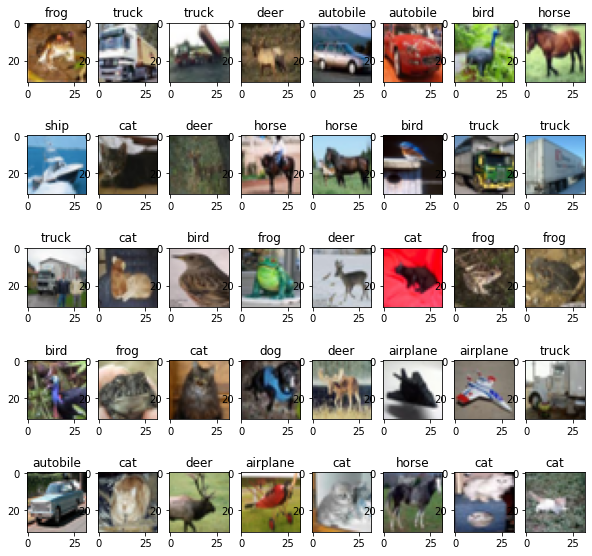

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 10))
labels = ["airplane", "autobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5,8,i+1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off")
    plt.tick_params(labelleft="off",left="off")
    plt.imshow(im)

plt.show()

Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8822 - accuracy: 0.3320 - val_loss: 1.7295 - val_accuracy: 0.3723
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6883 - accuracy: 0.3986 - val_loss: 1.6269 - val_accuracy: 0.4206
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6290 - accuracy: 0.4207 - val_loss: 1.5943 - val_accuracy: 0.4281
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5811 - accuracy: 0.4385 - val_loss: 1.6043 - val_accuracy: 0.4296
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5546 - accuracy: 0.4455 - val_loss: 1.5583 - val_accuracy: 0.4463
Epoch 6/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5328 - accuracy: 0.4550 - val_loss: 1.5334 - val_accuracy: 0.4549
Epoch 7/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5123 - accuracy: 0.4613 - val_loss: 1.5463 -

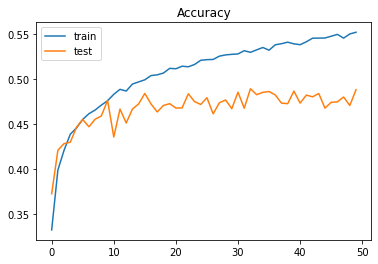

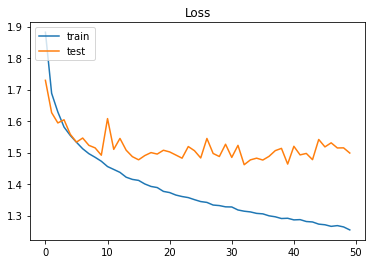

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(-1, im_size).astype("float32") / 255
X_test = X_test.reshape(-1, im_size).astype("float32") / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(im_size,)))
model.add(Dense(num_classes, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

hist = model.fit(X_train,y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)
print("正解率=", score[1], "loss=",score[0])

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train","test"], loc="upper left")
plt.show()
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train","test"], loc="upper left")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from karas.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

(X_train, y_train), (X_test, y_test)= cifar10.load_data()
X_train = X_train.astype("float32")/255
x_test = x_test.astype("float32")/255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32,(3,3),padding="same",
                 imput_shape=in_shape))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])


hist = model.fit(X_train,y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print("正解率=", score[1], "loss=",score[0])

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train","test"], loc="upper left")
plt.show()
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train","test"], loc="upper left")
plt.show()

ModuleNotFoundError: ignored

In [ ]:
#  model.save_weights("cifar10-weight.h5")

In [ ]:
import cv2
import numpy as np

labels = ["airplane", "autobile","bird","cat","deer","dog","frog","horse","ship","truck"]
im_size = 32 * 32 * 3

model.load_weights("cifar10-weight.h5")

im = cv2.imread("test-car.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im,(32,32))
plt.imshow(im)
plt.show()

im = im.reshape(im.size).astype("float32")/255

r = model.predict(np.array([im]),batch_size=32,verbose=1)
res = r[0]

for i, acc in enumerate(res):
    print(labels[i],"=",int(acc * 100))

print("---")
print("予測した結果＝",labels[res.argmax()])

In [ ]:
import numpy as np
print(np.array([1,0,9,3]).argmax())#結果２
print(np.array([1,3,2,9]).argmax())#結果３
print(np.array([9,0,2,3]).argmax())#結果０